In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


- This dataset contains a target/dependent variable(price column).
- It will actually come under supervised machine learning algorithm.
- K means clustering is an unsupervised machine learning algorithm
- We have to drop the target variable in the data to get the dataset for an unsupervised ML algorithm.

# Data cleaning

In [3]:
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [4]:
data = data.drop(['Unnamed: 0','Price'], axis =1)
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2


In [5]:
data = data.rename({'TotalFloor':'Total Floor','Living.Room':'Living Room'},axis = 1)

In [6]:
data.head()

,Sqft,Floor,Total Floor,Bedroom,Living Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2


In [7]:
data['Bedroom'].unique()

array([2, 4, 3, 1, 5, 6, 7], dtype=int64)

# selecting any two columns to perform K means clustering

In [8]:
x = data[['Sqft','Bedroom']]
x.head()

,Sqft,Bedroom
0,1177.698,2
1,2134.800,4
2,1138.560,2
3,1458.780,3
4,967.776,3


# Create numpy array

In [9]:
x = x.iloc[:,:].values
x

array([[1.177698e+03, 2.000000e+00],
       [2.134800e+03, 4.000000e+00],
       [1.138560e+03, 2.000000e+00],
       ...,
       [7.400640e+02, 1.000000e+00],
       [1.707840e+03, 3.000000e+00],
       [1.376946e+03, 3.000000e+00]])

# Apply K means clustering

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans

KMeans()

In [11]:
kmeans.fit(x)

KMeans()

# Checking the centre values of the cluster

In [12]:
kmeans.cluster_centers_

array([[1.80654909e+03, 3.36190476e+00],
       [1.04625285e+03, 2.57258065e+00],
       [3.74953900e+03, 3.33333333e+00],
       [1.42663940e+03, 3.00000000e+00],
       [3.00048117e+03, 3.72222222e+00],
       [6.56465232e+02, 1.58400000e+00],
       [5.31031500e+03, 4.25000000e+00],
       [2.19784456e+03, 3.58426966e+00]])

# Using elbow method we can find the optimal value of K in clustering.

In [13]:
x

array([[1.177698e+03, 2.000000e+00],
       [2.134800e+03, 4.000000e+00],
       [1.138560e+03, 2.000000e+00],
       ...,
       [7.400640e+02, 1.000000e+00],
       [1.707840e+03, 3.000000e+00],
       [1.376946e+03, 3.000000e+00]])

In [14]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

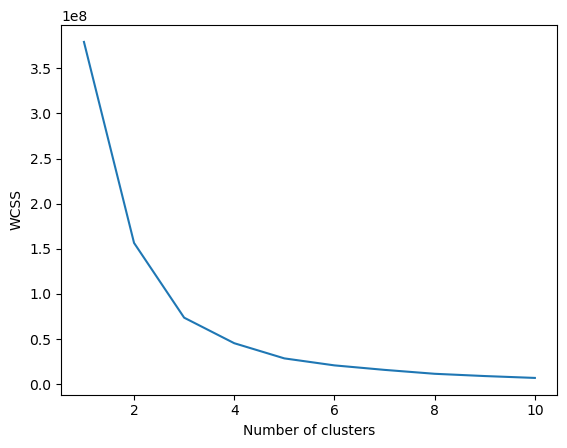

In [15]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

- Here we get K as 3.
- Apply this value to kmeans.

In [16]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [17]:
y_kmeans

array([1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0,
       1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2,
       0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2,

-Visualization.

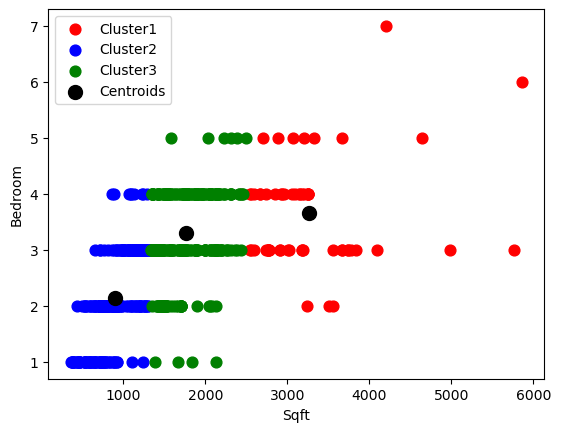

In [18]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Sqft')
plt.ylabel('Bedroom')
plt.legend() 
plt.show()

In [19]:
# when K=3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans

KMeans(n_clusters=3)

In [20]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [21]:
kmeans.cluster_centers_

array([[1.77022590e+03, 3.30420712e+00],
       [3.26961797e+03, 3.65517241e+00],
       [8.94606626e+02, 2.14748201e+00]])

# we can store the cluster center values as a csv file in our system.

In [22]:
df = pd.DataFrame(kmeans.cluster_centers_)

In [23]:
df

,0,1
0,1770.225903,3.304207
1,3269.617966,3.655172
2,894.606626,2.147482


In [24]:
df.to_csv("centroid_values.csv")